Name : Fake news Detection using machine learning 


Objective: To build a machine learning pipeline that classifies news articles as FAKE or TRUE using natural language processing techniques, feature extraction methods (TF-IDF and Word2Vec), and multiple classification models (Logistic Regression, Random Forest, and SVM), followed by comprehensive evaluation using accuracy, classification reports, confusion matrices, and ROC curves.

1. Data Loading and Preparation**

   * Load `True.csv` and `Fake.csv` using `pandas`.
   * Add a `label` column to distinguish TRUE and FAKE news.
   * Merge both datasets and shuffle the combined data.
   * Save the merged dataset to a CSV file.

2. Exploratory Data Analysis (EDA)**

   * Display label distribution using a count plot.
   * Show statistical summary of numeric columns.
   * Check for missing values in the dataset.

3. Text Preprocessing Setup**

   * Download necessary NLTK resources (`stopwords`, `wordnet`, `omw-1.4`).
   * Initialize stopwords and lemmatizer.

4. Data Splitting**

   * Split the dataset into training and testing sets using stratified sampling.

5. Text Cleaning and Lemmatization**

   * Convert text to lowercase, remove non-alphabetic characters.
   * Remove stopwords and apply lemmatization.
   * Apply the preprocessing function to both training and testing sets.

6. TF-IDF Vectorization**

   * Fit `TfidfVectorizer` on cleaned training text (with a max of 5000 features).
   * Transform both training and testing data using the same vectorizer.

7. Word2Vec Embedding**

   * Tokenize preprocessed text into word lists.
   * Train a Word2Vec model on training tokens.
   * Compute average Word2Vec embeddings for each document in both train and test sets.

8. Model Initialization and Training**

   * Initialize Logistic Regression, Random Forest, and SVM classifiers.
   * Train each model on both TF-IDF and Word2Vec features.

9. Model Evaluation (TF-IDF Features)**

   * Predict and evaluate using accuracy, classification report, and confusion matrix.
   * Visualize results with heatmaps.

10. Model Evaluation (Word2Vec Features)**

* Repeat predictions and evaluations on Word2Vec-based features.
* Visualize results with heatmaps.

11. ROC Curve Plotting**

* Generate probability scores for each model.
* Compute and plot ROC curves with AUC scores for all models (both TF-IDF and Word2Vec).


In [4]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.model_selection import StratifiedKFold

In [5]:
# Paths to your CSV files
fake_path = r"D:\SDP\News-_dataset\V_Fake.csv"
real_path = r"D:\SDP\News-_dataset\V_True.csv"

# Load datasets
fake_df = pd.read_csv(fake_path, encoding='latin1')
real_df = pd.read_csv(real_path, encoding='latin1')

# Add 'label' column
fake_df['label'] = 'FAKE'
real_df['label'] = 'TRUE'

# Combine datasets
validate_df = pd.concat([fake_df, real_df], ignore_index=True)

# Shuffle the data for better evaluation
validate_df = validate_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Save to CSV
validate_df.to_csv(r"D:\SDP\News-_dataset\validate.csv", index=False)

print("Validation dataset created and saved at D:\\SDP\\News-_dataset\\validate.csv")
print(validate_df.head())


Validation dataset created and saved at D:\SDP\News-_dataset\validate.csv
                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews   
3  On Monday, Donald Trump once again embarrassed...          News   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews   

                  date label  
0    February 13, 2017  FAKE  
1       April 5, 2017   TRUE  
2  September 27, 2017   TRUE  
3         May 22, 2017  FAKE  
4       June 

In [6]:
# Dataset folder path (without trailing backslash)
data_path = r"D:\SDP\News-_dataset"

# Use the actual filenames after verifying
true_path = os.path.join(data_path, "True.csv")
fake_path = os.path.join(data_path, "Fake.csv")
validate_df = pd.read_csv(os.path.join(data_path, "Validate.csv"))

# Split Validate.csv into 80% train and 20% test
validate_train, validate_test = train_test_split(validate_df, test_size=0.2, random_state=42, shuffle=True)

In [7]:
# Load CSV files
true_df = pd.read_csv(true_path)
fake_df = pd.read_csv(fake_path)

# Add label columns
true_df["label"] = "TRUE"
fake_df["label"] = "FAKE"

In [8]:
# Merge and shuffle
merged_df = pd.concat([true_df, fake_df,validate_train], ignore_index=True)
merged_df = merged_df.sample(frac=1, random_state=42).reset_index(drop=True) 

In [9]:
# Drop 'subject' and 'date' columns if present
columns_to_drop = ['subject', 'date']
merged_df = merged_df.drop(columns=[col for col in columns_to_drop if col in merged_df.columns])

In [10]:
# add a head file to show suffle
print(merged_df.head())  # Show the first 5 rows

                                               title  \
0   These 10 Seconds Of Sarah Palinâs INSANE Tr...   
1  Virginia governor says confident campaign dono...   
2  Brigitte Gabriel Reveals Muslim Brotherhood “P...   
3     Boiler Room #104 – War Sells… But Who’s Buying   
4  China is behaving like a 'bully' in South Chin...   

                                                text label  
0  Pretty much all of Sarah Palin s endorsement o...  FAKE  
1  WASHINGTON (Reuters) - Terry McAuliffe, Virgin...  TRUE  
2  Brigitte Gabriel is a Christian who, after bei...  FAKE  
3  Tune in to the Alternate Current Radio Network...  FAKE  
4  SYDNEY (Reuters) - China is behaving like a â...  TRUE  


In [11]:
# Save merged CSV
merged_csv_path = os.path.join(data_path, "merged_news.csv")
merged_df.to_csv(merged_csv_path, index=False)

# Show counts
print("\nNews Label Counts:")
print(merged_df["label"].value_counts())



News Label Counts:
label
FAKE    42252
TRUE    38564
Name: count, dtype: int64


In [12]:
# 1. Basic information about the dataset
print("Dataset Info:")
print(merged_df.info())  # Basic details: column names, non-null counts, types
print("\nFirst 5 rows:")
print(merged_df.head())  # Show the first 5 rows


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80816 entries, 0 to 80815
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   80816 non-null  object
 1   text    80816 non-null  object
 2   label   80816 non-null  object
dtypes: object(3)
memory usage: 1.8+ MB
None

First 5 rows:
                                               title  \
0   These 10 Seconds Of Sarah Palinâs INSANE Tr...   
1  Virginia governor says confident campaign dono...   
2  Brigitte Gabriel Reveals Muslim Brotherhood “P...   
3     Boiler Room #104 – War Sells… But Who’s Buying   
4  China is behaving like a 'bully' in South Chin...   

                                                text label  
0  Pretty much all of Sarah Palin s endorsement o...  FAKE  
1  WASHINGTON (Reuters) - Terry McAuliffe, Virgin...  TRUE  
2  Brigitte Gabriel is a Christian who, after bei...  FAKE  
3  Tune in to the Alternate Current Radio Network...  FAK

In [13]:
# 2. Statistical summary for numeric columns (if any)
print("\nStatistical Summary:")
print(merged_df.describe().T)  # Summary stats for numeric columns


Statistical Summary:
       count unique                                                top   freq
title  80816  47825  Factbox: Trump fills top jobs for his administ...     24
text   80816  47252                                                      1130
label  80816      2                                               FAKE  42252


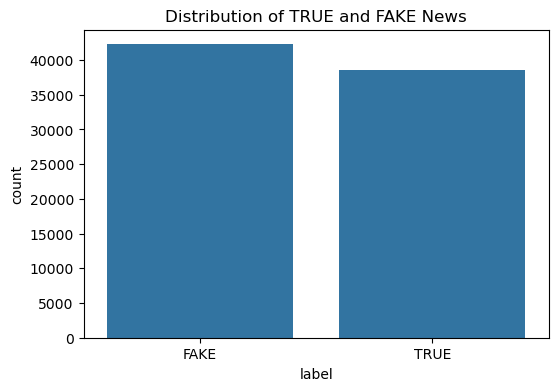

In [14]:
# 3. Distribution of the labels (TRUE vs FAKE news)
plt.figure(figsize=(6, 4))
sns.countplot(data=merged_df, x='label')
plt.title("Distribution of TRUE and FAKE News")
plt.show()

In [15]:
# 4. Check for missing values
print("\nMissing Values:")
print(merged_df.isnull().sum())  # Count of missing values for each column


Missing Values:
title    0
text     0
label    0
dtype: int64


In [16]:
# 5. Word Cloud for visualizing the most frequent words in articles
# Concatenate all text in the dataset
# text = " ".join(merged_df['text'].dropna())  # Remove any NaN values from 'text' column
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

In [17]:
# Display the word cloud
# plt.figure(figsize=(10, 6))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')  # Remove axes for better visualization
# plt.title("Word Cloud for News Articles")
# plt.show()

# # 6. Most common words (optional - display a bar plot)
# from collections import Counter
# import re

# # Function to clean and tokenize text
# def tokenize(text):
#     # Remove non-alphanumeric characters (like punctuation) and split by space
#     words = re.findall(r'\b\w+\b', text.lower())
#     return words

# # Tokenize the text data and get word frequency
# all_words = merged_df['text'].dropna().apply(tokenize).sum()
# word_counts = Counter(all_words)

# # Get the most common words
# most_common_words = word_counts.most_common(10)

# # Plot most common words
# common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])
# plt.figure(figsize=(10, 6))
# sns.barplot(data=common_words_df, x='Word', y='Count')
# plt.title("Top 10 Most Common Words in News Articles")
# plt.xticks(rotation=45)
# plt.show()

In [18]:
# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\panda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\panda\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [20]:
train_df, test_df = train_test_split(merged_df, test_size=0.2, random_state=42, stratify=merged_df['label'])

In [21]:
print(f"Number of training samples: {len(train_df)}")
print(f"Number of testing samples: {len(test_df)}")

Number of training samples: 64652
Number of testing samples: 16164


In [22]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [23]:
# Apply preprocessing only to training data
train_df['clean_text'] = train_df['text'].astype(str).apply(preprocess_text)

In [24]:
def get_dataset_stats(texts):
    total_lowered = 0
    total_spaces_removed = 0
    total_stopwords_removed = 0
    total_words_lemmatized = 0

    for text in texts:
        original_text = text

        lowered_text = text.lower()
        lowered_count = sum(1 for c1, c2 in zip(original_text, lowered_text) if c1 != c2)

        text_alpha = re.sub(r'[^a-z\s]', '', lowered_text)

        original_spaces = lowered_text.count(' ')
        alpha_spaces = text_alpha.count(' ')
        removed_spaces = original_spaces - alpha_spaces

        tokens = text_alpha.split()

        stopword_count = 0
        lemmatized_count = 0
        for word in tokens:
            if word in stop_words:
                stopword_count += 1
                continue
            lemma = lemmatizer.lemmatize(word)
            if lemma != word:
                lemmatized_count += 1

        total_lowered += lowered_count
        total_spaces_removed += removed_spaces
        total_stopwords_removed += stopword_count
        total_words_lemmatized += lemmatized_count

    print(f"Total characters converted to lowercase: {total_lowered}")
    print(f"Total spaces removed during cleanup: {total_spaces_removed}")
    print(f"Total stopwords removed: {total_stopwords_removed}")
    print(f"Total words lemmatized: {total_words_lemmatized}")


In [25]:
get_dataset_stats(train_df['text'].astype(str))

Total characters converted to lowercase: 6189188
Total spaces removed during cleanup: 0
Total stopwords removed: 11060135
Total words lemmatized: 1844170


In [26]:
# Step 4: Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_df['clean_text'])
y_train = train_df['label'].map({'FAKE': 0, 'TRUE': 1})

In [27]:
# Apply SAME vectorizer to test data (without refitting)
test_df['clean_text'] = test_df['text'].astype(str).apply(preprocess_text)
X_test = vectorizer.transform(test_df['clean_text'])
y_test = test_df['label'].map({'FAKE': 0, 'TRUE': 1})

In [28]:
validate_test['clean_text'] = validate_test['text'].astype(str).apply(preprocess_text)
X_validate = vectorizer.transform(validate_test['clean_text'])
y_validate = validate_test['label'].map({'FAKE': 0, 'TRUE': 1})

In [29]:
# Print final stats
print("Train set size:", X_train.shape)
print("Test set size :", X_test.shape)
print("Validate set size :", X_validate.shape)
print("Label distribution (train):")
print(y_train.value_counts())

Train set size: (64652, 5000)
Test set size : (16164, 5000)
Validate set size : (8980, 5000)
Label distribution (train):
label
0    33801
1    30851
Name: count, dtype: int64



K-Fold Cross Validation (Logistic Regression)
  Fold 1: Accuracy=0.9897, Precision=0.9884, Recall=0.9901, F1 Score=0.9892
  Fold 2: Accuracy=0.9908, Precision=0.9892, Recall=0.9916, F1 Score=0.9904
  Fold 3: Accuracy=0.9910, Precision=0.9890, Recall=0.9922, F1 Score=0.9906
  Fold 4: Accuracy=0.9908, Precision=0.9874, Recall=0.9934, F1 Score=0.9904
  Fold 5: Accuracy=0.9918, Precision=0.9897, Recall=0.9932, F1 Score=0.9914

  Average CV Results:
Accuracy     0.990828
Precision    0.988727
Recall       0.992091
F1 Score     0.990405
dtype: float64

K-Fold Cross Validation (SVM)
  Fold 1: Accuracy=0.9940, Precision=0.9926, Recall=0.9950, F1 Score=0.9938
  Fold 2: Accuracy=0.9953, Precision=0.9943, Recall=0.9958, F1 Score=0.9951
  Fold 3: Accuracy=0.9946, Precision=0.9929, Recall=0.9958, F1 Score=0.9943
  Fold 4: Accuracy=0.9959, Precision=0.9948, Recall=0.9966, F1 Score=0.9957
  Fold 5: Accuracy=0.9960, Precision=0.9950, Recall=0.9966, F1 Score=0.9958

  Average CV Results:
Accuracy     

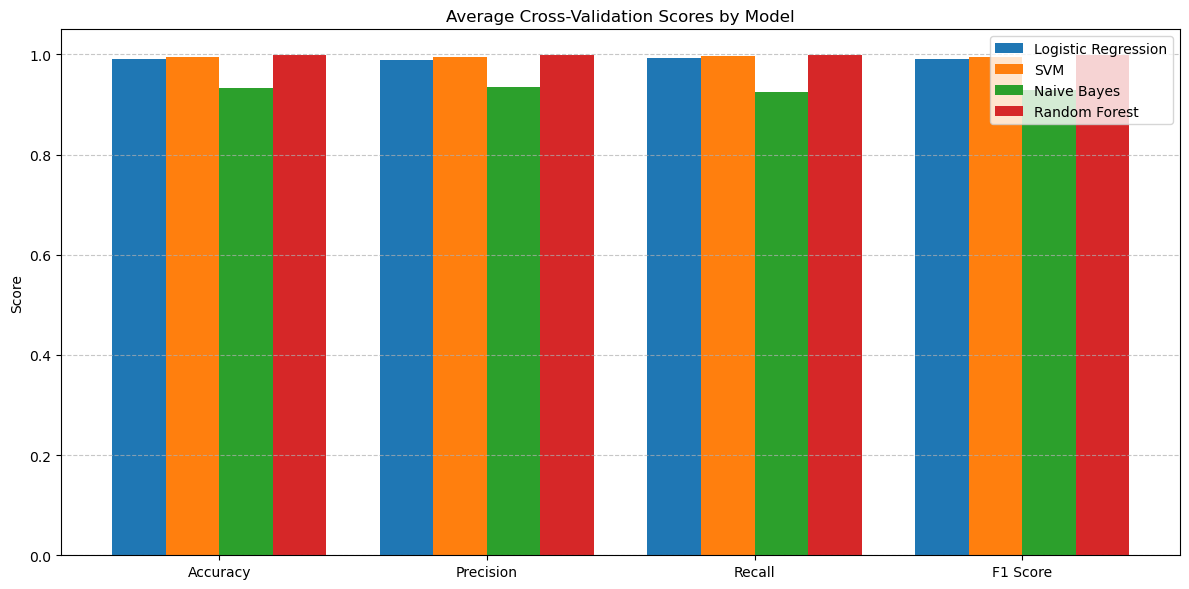

In [30]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Naive Bayes": MultinomialNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# To store average scores
avg_scores = {}

for model_name, model in models.items():
    print(f"\nK-Fold Cross Validation ({model_name})")
    fold = 1
    results = []

    for train_index, val_index in skf.split(X_train, y_train):
        X_tr, X_val = X_train[train_index], X_train[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred)
        rec = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        print(f"  Fold {fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1 Score={f1:.4f}")
        results.append((acc, prec, rec, f1))
        fold += 1

    avg = pd.DataFrame(results, columns=["Accuracy", "Precision", "Recall", "F1 Score"]).mean()
    avg_scores[model_name] = avg
    print("\n  Average CV Results:")
    print(avg)

# Bar Graph of Average Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_names = list(avg_scores.keys())
scores_matrix = np.array([avg_scores[model][metrics].values for model in model_names])

x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(12, 6))
for i, model_name in enumerate(model_names):
    plt.bar(x + i * width, scores_matrix[i], width, label=model_name)

plt.ylabel('Score')
plt.title('Average Cross-Validation Scores by Model')
plt.xticks(x + width * 1.5, metrics)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [31]:
# Final training on full TF-IDF training set (after K-Fold evaluation)
log_reg = LogisticRegression(max_iter=1000, random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
svm = SVC(kernel='linear', probability=True, random_state=42)
naive_bayes = MultinomialNB()

log_reg.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
svm.fit(X_train, y_train)
naive_bayes.fit(X_train, y_train)

print("\nFinal training complete for all TF-IDF models.")


Final training complete for all TF-IDF models.


In [32]:
# Step 4B: Word2Vec Embedding (Embedding-Based)
train_tokens = train_df['clean_text'].apply(lambda x: x.split())
test_tokens = test_df['clean_text'].apply(lambda x: x.split())
validate_tokens = validate_test['clean_text'].apply(lambda x: x.split())

# Train Word2Vec model on training tokens
w2v_model = Word2Vec(sentences=train_tokens, vector_size=100, window=5, min_count=2, workers=4, seed=42)

# Function to compute average Word2Vec vector for each document
def get_avg_word2vec(tokens, model, vector_size):
    if not tokens:
        return np.zeros(vector_size)
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if vectors:
        return np.mean(vectors, axis=0)
    else:
        return np.zeros(vector_size)

# Compute embedding-based features
X_train_w2v = np.vstack(train_tokens.apply(lambda tokens: get_avg_word2vec(tokens, w2v_model, 100)))
X_test_w2v = np.vstack(test_tokens.apply(lambda tokens: get_avg_word2vec(tokens, w2v_model, 100)))
X_validate_w2v = np.vstack(validate_tokens.apply(lambda tokens: get_avg_word2vec(tokens, w2v_model, 100)))

print("\nWord2Vec Feature Set:")
print(" - Train set:", X_train_w2v.shape)
print(" - Test set :", X_test_w2v.shape)
print(" - Validate set :", X_validate_w2v.shape)

print("\nLabel distribution (train):")
print(y_train.value_counts())


Word2Vec Feature Set:
 - Train set: (64652, 100)
 - Test set : (16164, 100)
 - Validate set : (8980, 100)

Label distribution (train):
label
0    33801
1    30851
Name: count, dtype: int64



K-Fold Cross Validation (Word2Vec + Logistic Regression)
  Fold 1: Accuracy=0.9692, Precision=0.9649, Recall=0.9708, F1 Score=0.9679
  Fold 2: Accuracy=0.9716, Precision=0.9694, Recall=0.9712, F1 Score=0.9703
  Fold 3: Accuracy=0.9729, Precision=0.9688, Recall=0.9747, F1 Score=0.9717
  Fold 4: Accuracy=0.9714, Precision=0.9688, Recall=0.9713, F1 Score=0.9701
  Fold 5: Accuracy=0.9738, Precision=0.9714, Recall=0.9737, F1 Score=0.9726

  Average CV Results:
Accuracy     0.971787
Precision    0.968649
Recall       0.972351
F1 Score     0.970496
dtype: float64

K-Fold Cross Validation (Word2Vec + Random Forest)
  Fold 1: Accuracy=0.9840, Precision=0.9858, Recall=0.9806, F1 Score=0.9832
  Fold 2: Accuracy=0.9871, Precision=0.9884, Recall=0.9844, F1 Score=0.9864
  Fold 3: Accuracy=0.9868, Precision=0.9876, Recall=0.9846, F1 Score=0.9861
  Fold 4: Accuracy=0.9886, Precision=0.9893, Recall=0.9867, F1 Score=0.9880
  Fold 5: Accuracy=0.9889, Precision=0.9902, Recall=0.9865, F1 Score=0.9884

  A

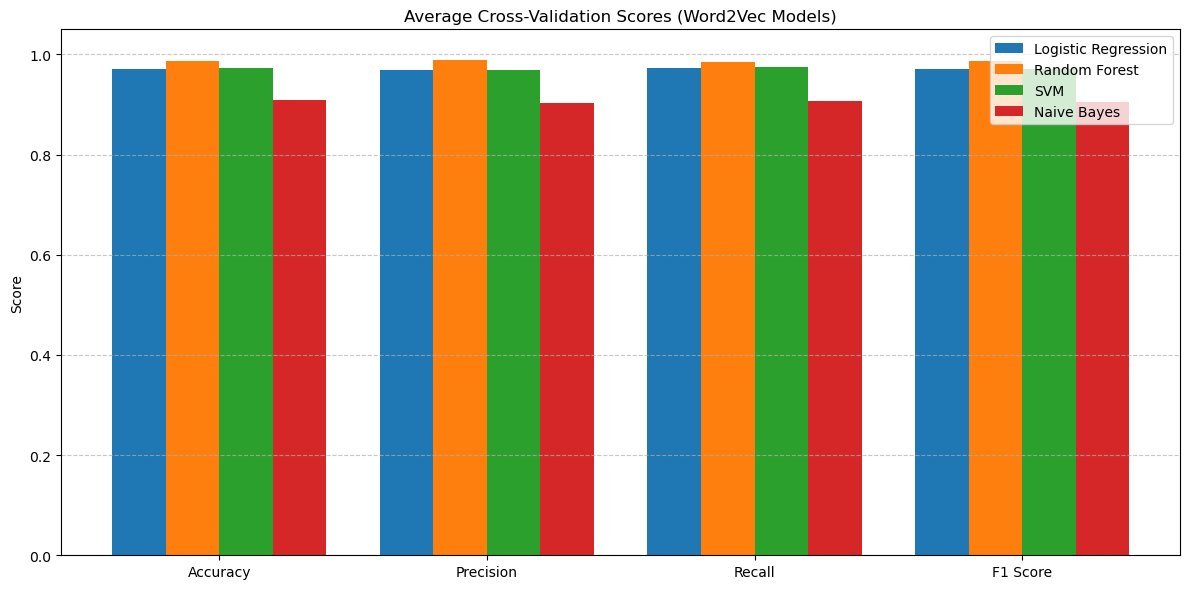

In [33]:
# Define models for Word2Vec
models_w2v = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', probability=True, random_state=42),
    "Naive Bayes": GaussianNB()
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Store average scores
avg_scores_w2v = {}

for model_name, model in models_w2v.items():
    print(f"\nK-Fold Cross Validation (Word2Vec + {model_name})")
    fold = 1
    results = []

    for train_index, val_index in skf.split(X_train_w2v, y_train):
        X_tr, X_val = X_train_w2v[train_index], X_train_w2v[val_index]
        y_tr, y_val = y_train.iloc[train_index], y_train.iloc[val_index]

        model.fit(X_tr, y_tr)
        y_pred = model.predict(X_val)

        acc = accuracy_score(y_val, y_pred)
        prec = precision_score(y_val, y_pred)
        rec = recall_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)

        print(f"  Fold {fold}: Accuracy={acc:.4f}, Precision={prec:.4f}, Recall={rec:.4f}, F1 Score={f1:.4f}")
        results.append((acc, prec, rec, f1))
        fold += 1

    avg = pd.DataFrame(results, columns=["Accuracy", "Precision", "Recall", "F1 Score"]).mean()
    avg_scores_w2v[model_name] = avg
    print("\n  Average CV Results:")
    print(avg)

metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_names = list(avg_scores_w2v.keys())
scores_matrix = np.array([avg_scores_w2v[model][metrics].values for model in model_names])

x = np.arange(len(metrics))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(12, 6))
for i, model_name in enumerate(model_names):
    plt.bar(x + i * width, scores_matrix[i], width, label=model_name)

plt.ylabel('Score')
plt.title('Average Cross-Validation Scores (Word2Vec Models)')
plt.xticks(x + width * 1.5, metrics)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [34]:
# Final training on full Word2Vec feature set
log_reg_w2v = LogisticRegression(max_iter=1000, random_state=42)
random_forest_w2v = RandomForestClassifier(n_estimators=100, random_state=42)
svm_w2v = SVC(kernel='linear', probability=True, random_state=42)
naive_bayes_w2v = GaussianNB()

# Fit models
log_reg_w2v.fit(X_train_w2v, y_train)
random_forest_w2v.fit(X_train_w2v, y_train)
svm_w2v.fit(X_train_w2v, y_train)
naive_bayes_w2v.fit(X_train_w2v, y_train)

print("\nFinal training complete for all Word2Vec models.")


Final training complete for all Word2Vec models.


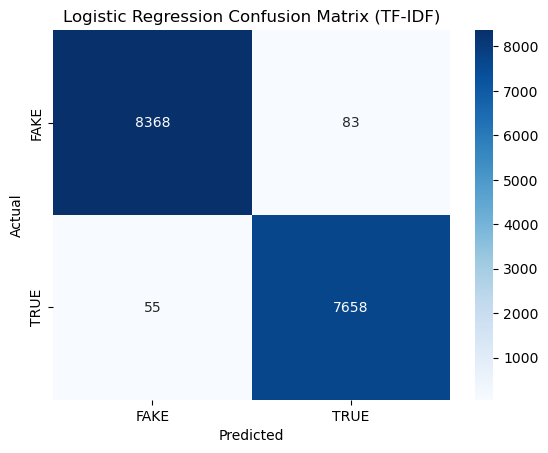

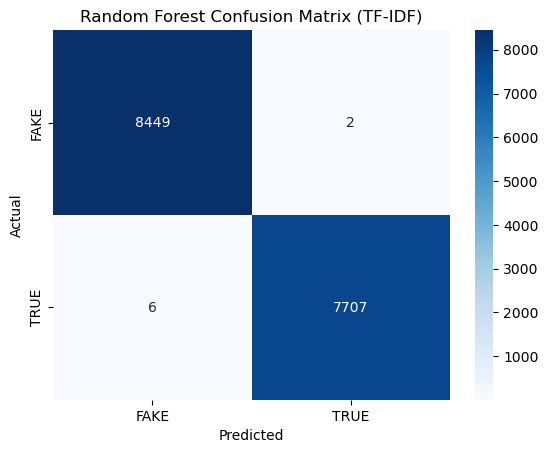

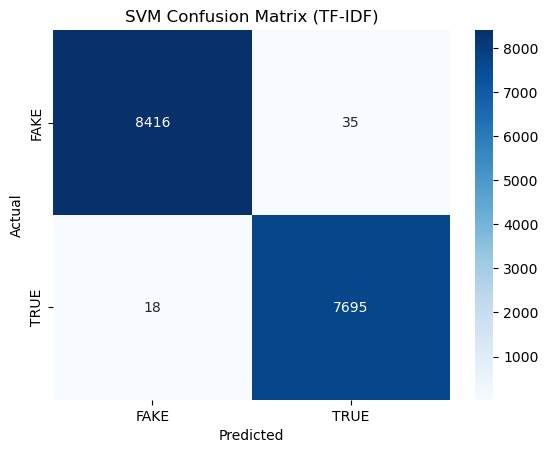

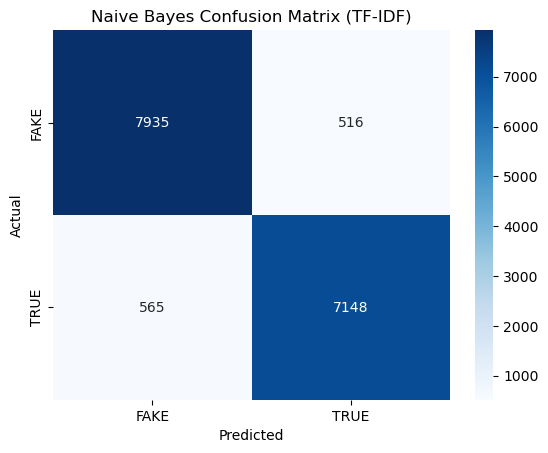

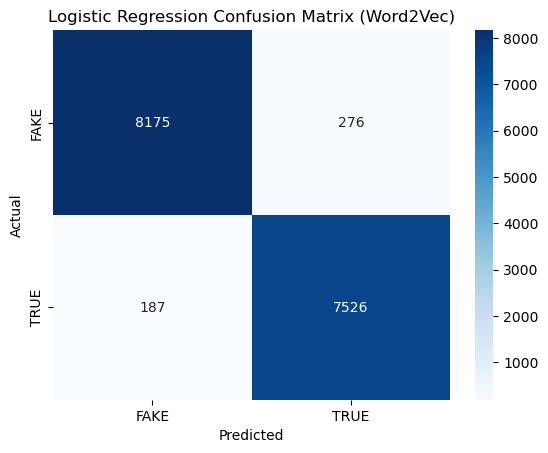

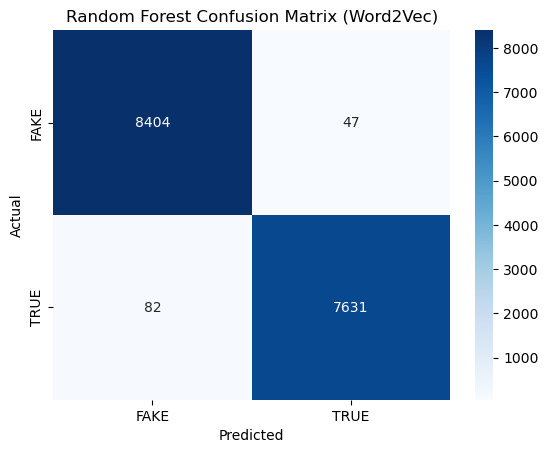

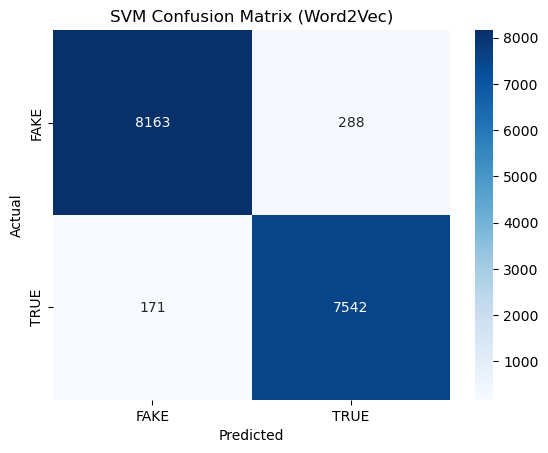

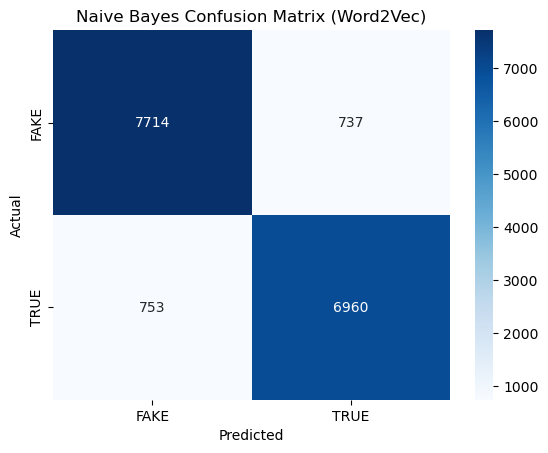


Evaluation Metrics Summary:
              Model Feature Type  Accuracy  Precision   Recall  F1 Score
Logistic Regression       TF-IDF  0.991463   0.989278 0.992869  0.991070
      Random Forest       TF-IDF  0.999505   0.999741 0.999222  0.999481
                SVM       TF-IDF  0.996721   0.995472 0.997666  0.996568
        Naive Bayes       TF-IDF  0.933123   0.932672 0.926747  0.929700
Logistic Regression     Word2Vec  0.971356   0.964624 0.975755  0.970158
      Random Forest     Word2Vec  0.992019   0.993879 0.989369  0.991618
                SVM     Word2Vec  0.971604   0.963218 0.977830  0.970469
        Naive Bayes     Word2Vec  0.907820   0.904248 0.902373  0.903310


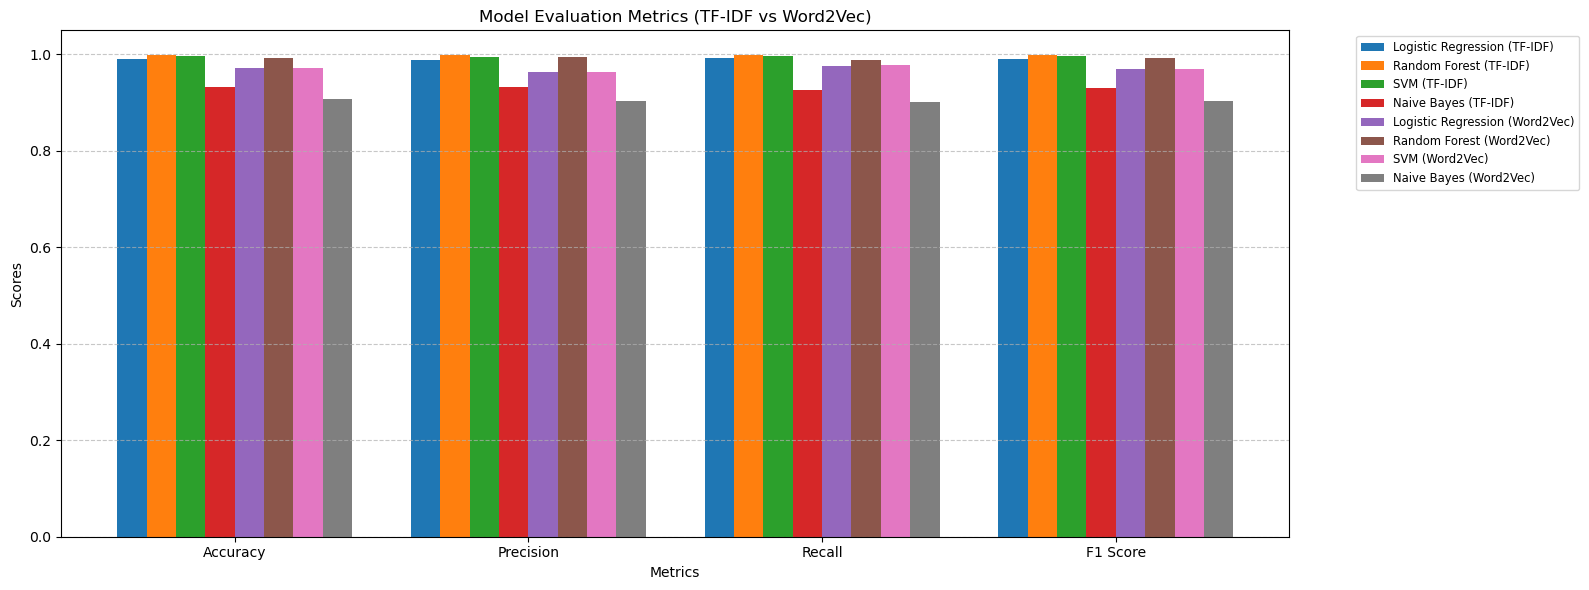

In [35]:
# Helper function to collect metrics
def evaluate_model(model, X_test, y_test, name, feature_type, results):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "Feature Type": feature_type,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    })

    # Optional: Plot confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["FAKE", "TRUE"], yticklabels=["FAKE", "TRUE"])
    plt.title(f"{name} Confusion Matrix ({feature_type})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# List to store results
results = []

# Evaluate on TF-IDF features
evaluate_model(log_reg, X_test, y_test, "Logistic Regression", "TF-IDF", results)
evaluate_model(random_forest, X_test, y_test, "Random Forest", "TF-IDF", results)
evaluate_model(svm, X_test, y_test, "SVM", "TF-IDF", results)
evaluate_model(naive_bayes, X_test, y_test, "Naive Bayes", "TF-IDF", results)

# Evaluate on Word2Vec features
evaluate_model(log_reg_w2v, X_test_w2v, y_test, "Logistic Regression", "Word2Vec", results)
evaluate_model(random_forest_w2v, X_test_w2v, y_test, "Random Forest", "Word2Vec", results)
evaluate_model(svm_w2v, X_test_w2v, y_test, "SVM", "Word2Vec", results)
evaluate_model(naive_bayes_w2v, X_test_w2v, y_test, "Naive Bayes", "Word2Vec", results)

# Create DataFrame to show results
df_results = pd.DataFrame(results)
df_results = df_results[["Model", "Feature Type", "Accuracy", "Precision", "Recall", "F1 Score"]]

# Display as a table
print("\nEvaluation Metrics Summary:")
print(df_results.to_string(index=False))

# Unique metric names and models
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_labels = df_results["Model"] + " (" + df_results["Feature Type"] + ")"

# Bar chart data
x = np.arange(len(metrics))  # Metric positions
width = 0.1  # Width of each bar
n_models = len(df_results)

plt.figure(figsize=(16, 6))

for i, row in df_results.iterrows():
    values = [row[metric] for metric in metrics]
    plt.bar(x + i * width, values, width=width, label=model_labels.iloc[i])

# Formatting
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Model Evaluation Metrics (TF-IDF vs Word2Vec)")
plt.xticks(x + width * (n_models / 2 - 0.5), metrics)
plt.ylim(0, 1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

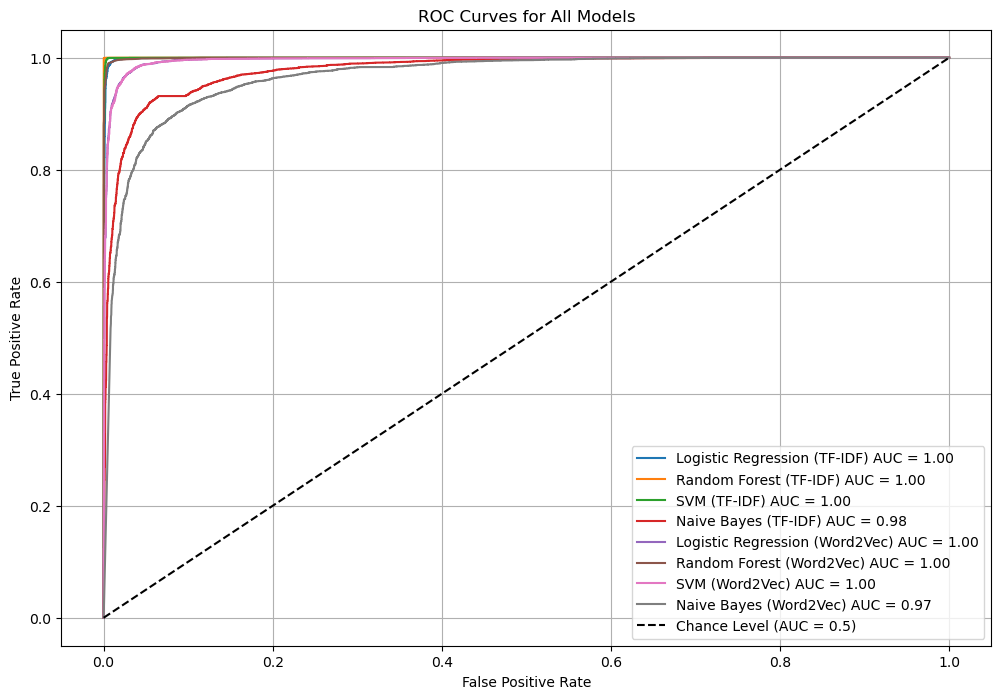

In [36]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Ensure binary labels for ROC
y_test_bin = label_binarize(y_test, classes=[0, 1]).ravel()

# ROC plotting helper
def plot_roc(model, X_test, y_test, model_name, feature_type):
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        print(f"Model {model_name} does not support predict_proba; skipping.")
        return
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} ({feature_type}) AUC = {roc_auc:.2f}')

# Plot ROC curves
plt.figure(figsize=(12, 8))

# TF-IDF models
plot_roc(log_reg, X_test, y_test_bin, "Logistic Regression", "TF-IDF")
plot_roc(random_forest, X_test, y_test_bin, "Random Forest", "TF-IDF")
plot_roc(svm, X_test, y_test_bin, "SVM", "TF-IDF")
plot_roc(naive_bayes, X_test, y_test_bin, "Naive Bayes", "TF-IDF")

# Word2Vec models
plot_roc(log_reg_w2v, X_test_w2v, y_test_bin, "Logistic Regression", "Word2Vec")
plot_roc(random_forest_w2v, X_test_w2v, y_test_bin, "Random Forest", "Word2Vec")
plot_roc(svm_w2v, X_test_w2v, y_test_bin, "SVM", "Word2Vec")
plot_roc(naive_bayes_w2v, X_test_w2v, y_test_bin, "Naive Bayes", "Word2Vec")

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Chance Level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


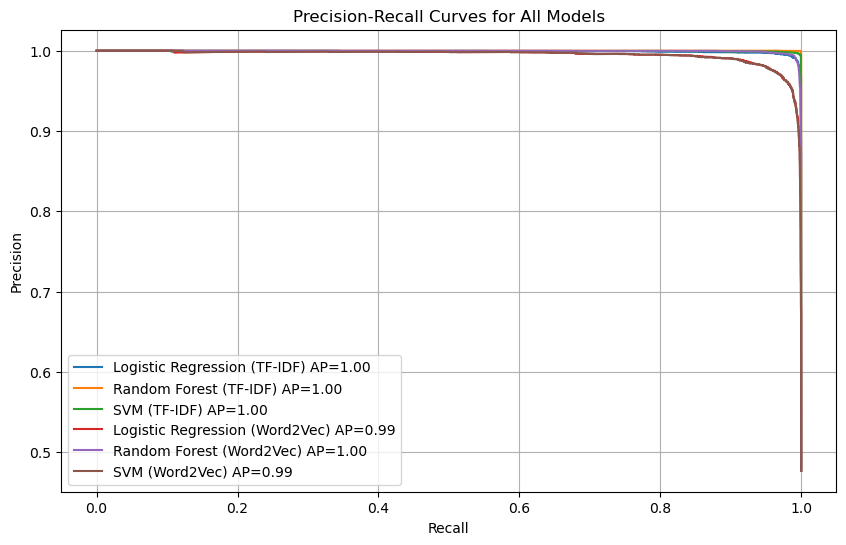

In [37]:
# Plotting function
def plot_precision_recall(model, X_test, y_test, model_name, feature_type):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    avg_precision = average_precision_score(y_test, y_prob)
    
    plt.plot(recall, precision, label=f'{model_name} ({feature_type}) AP={avg_precision:.2f}')

# Precision-Recall Curves
plt.figure(figsize=(10, 6))

# TF-IDF
plot_precision_recall(log_reg, X_test, y_test_bin, "Logistic Regression", "TF-IDF")
plot_precision_recall(random_forest, X_test, y_test_bin, "Random Forest", "TF-IDF")
plot_precision_recall(svm, X_test, y_test_bin, "SVM", "TF-IDF")

# Word2Vec
plot_precision_recall(log_reg_w2v, X_test_w2v, y_test_bin, "Logistic Regression", "Word2Vec")
plot_precision_recall(random_forest_w2v, X_test_w2v, y_test_bin, "Random Forest", "Word2Vec")
plot_precision_recall(svm_w2v, X_test_w2v, y_test_bin, "SVM", "Word2Vec")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [38]:
results_validate_test = []

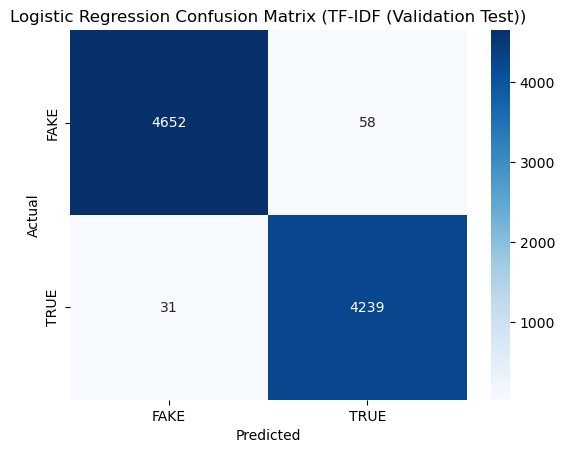

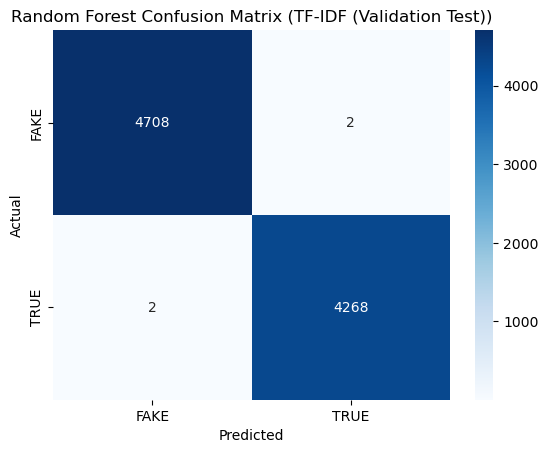

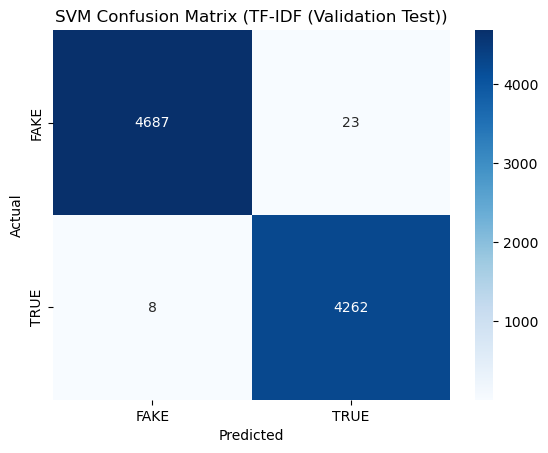

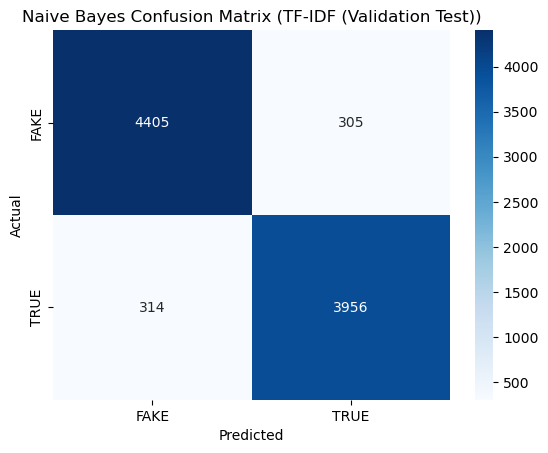

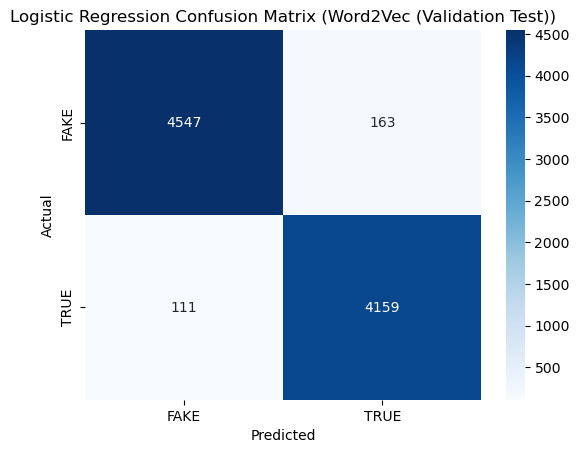

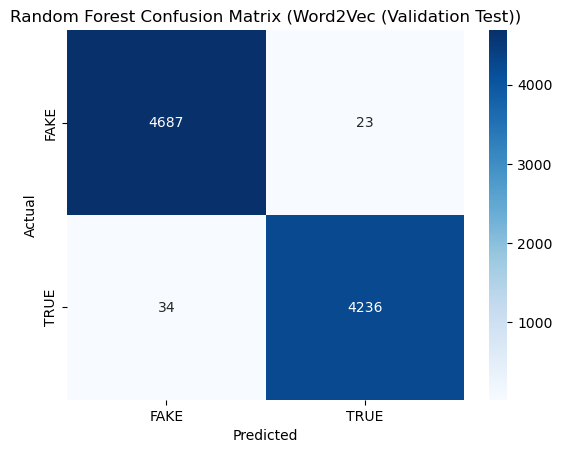

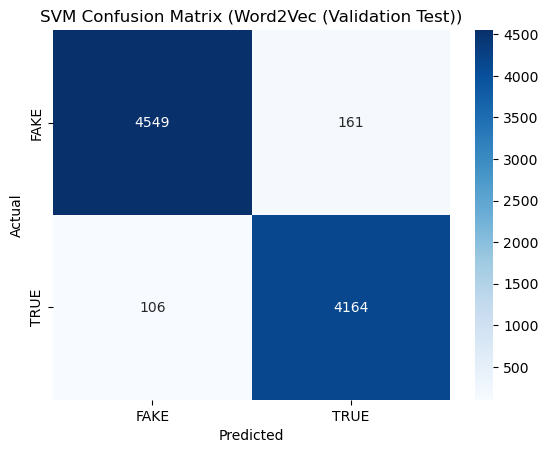

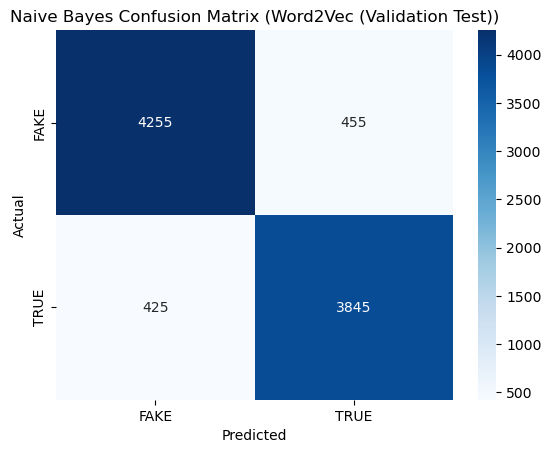

In [39]:
# Evaluate on TF-IDF features
evaluate_model(log_reg, X_validate, y_validate, "Logistic Regression", "TF-IDF (Validation Test)", results_validate_test)
evaluate_model(random_forest, X_validate, y_validate, "Random Forest", "TF-IDF (Validation Test)", results_validate_test)
evaluate_model(svm, X_validate, y_validate, "SVM", "TF-IDF (Validation Test)", results_validate_test)
evaluate_model(naive_bayes, X_validate, y_validate, "Naive Bayes", "TF-IDF (Validation Test)", results_validate_test)

# Evaluate on Word2Vec features
evaluate_model(log_reg_w2v, X_validate_w2v, y_validate, "Logistic Regression", "Word2Vec (Validation Test)", results_validate_test)
evaluate_model(random_forest_w2v, X_validate_w2v, y_validate, "Random Forest", "Word2Vec (Validation Test)", results_validate_test)
evaluate_model(svm_w2v, X_validate_w2v, y_validate, "SVM", "Word2Vec (Validation Test)", results_validate_test)
evaluate_model(naive_bayes_w2v, X_validate_w2v, y_validate, "Naive Bayes", "Word2Vec (Validation Test)", results_validate_test)



Validation Metrics Summary:
              Model               Feature Type  Accuracy  Precision   Recall  F1 Score
Logistic Regression   TF-IDF (Validation Test)  0.990089   0.986502 0.992740  0.989611
      Random Forest   TF-IDF (Validation Test)  0.999555   0.999532 0.999532  0.999532
                SVM   TF-IDF (Validation Test)  0.996548   0.994632 0.998126  0.996376
        Naive Bayes   TF-IDF (Validation Test)  0.931069   0.928421 0.926464  0.927441
Logistic Regression Word2Vec (Validation Test)  0.969488   0.962286 0.974005  0.968110
      Random Forest Word2Vec (Validation Test)  0.993653   0.994600 0.992037  0.993317
                SVM Word2Vec (Validation Test)  0.970267   0.962775 0.975176  0.968935
        Naive Bayes Word2Vec (Validation Test)  0.902004   0.894186 0.900468  0.897316


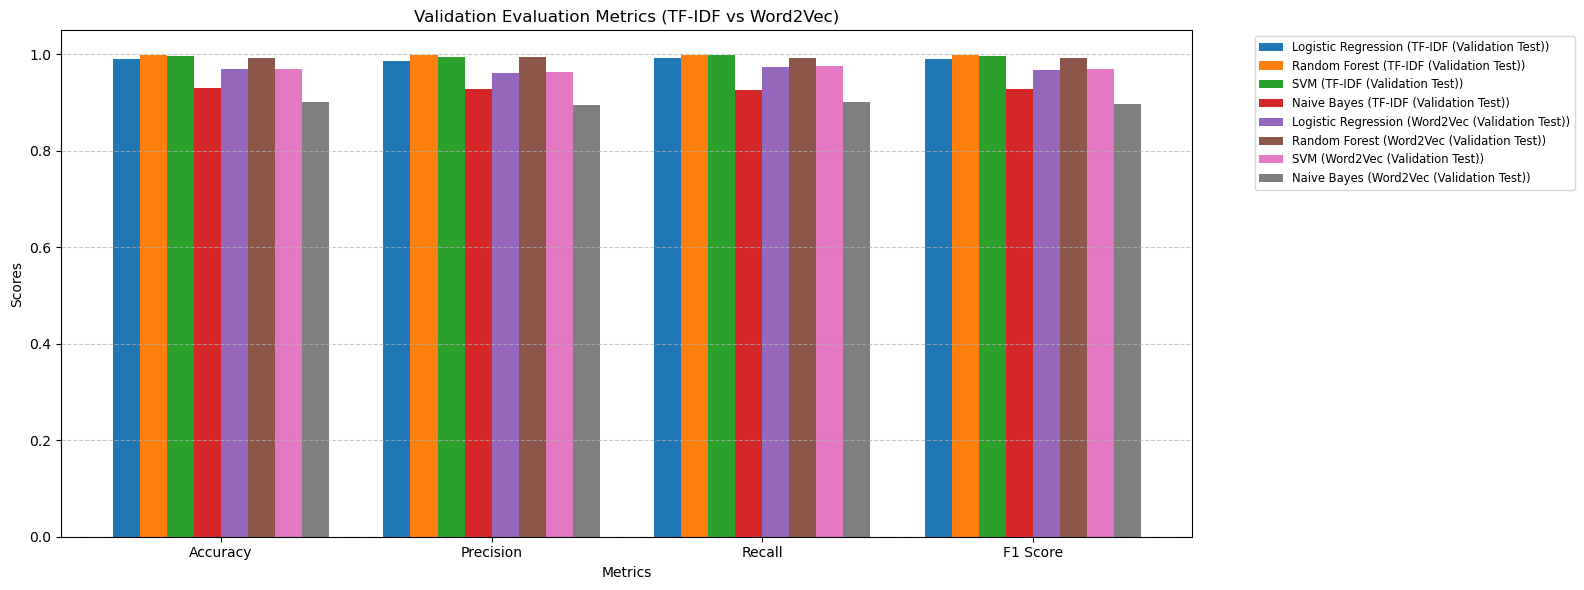

In [40]:
df_results_validate = pd.DataFrame(results_validate_test)
df_results_validate = df_results_validate[["Model", "Feature Type", "Accuracy", "Precision", "Recall", "F1 Score"]]

print("\nValidation Metrics Summary:")
print(df_results_validate.to_string(index=False))

# Unique metric names and labels for validation models
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
model_labels_val = df_results_validate["Model"] + " (" + df_results_validate["Feature Type"] + ")"

# Set bar positions and width
x = np.arange(len(metrics))  # [0, 1, 2, 3]
width = 0.1  # Width of each bar
n_models = len(df_results_validate)

plt.figure(figsize=(16, 6))

# Plot bars for each model
for i, row in df_results_validate.iterrows():
    values = [row[metric] for metric in metrics]
    plt.bar(x + i * width, values, width=width, label=model_labels_val.iloc[i])

# Formatting
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("Validation Evaluation Metrics (TF-IDF vs Word2Vec)")
plt.xticks(x + width * (n_models / 2 - 0.5), metrics)
plt.ylim(0, 1.05)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))

# TF-IDF models
plot_roc(log_reg, X_validate, y_validate, "Logistic Regression", "TF-IDF")
plot_roc(random_forest, X_validate, y_validate, "Random Forest", "TF-IDF")
plot_roc(svm, X_validate, y_validate, "SVM", "TF-IDF")
plot_roc(naive_bayes, X_validate, y_validate, "Naive Bayes", "TF-IDF")

# Word2Vec models
plot_roc(log_reg_w2v, X_validate_w2v, y_validate, "Logistic Regression", "Word2Vec")
plot_roc(random_forest_w2v, X_validate_w2v, y_validate, "Random Forest", "Word2Vec")
plot_roc(svm_w2v, X_validate_w2v, y_validate, "SVM", "Word2Vec")
plot_roc(naive_bayes_w2v, X_validate_w2v, y_validate, "Naive Bayes", "Word2Vec")

plt.plot([0, 1], [0, 1], 'k--', label='Chance Level (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models (Validation Test)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
plt.figure(figsize=(12, 8))

# TF-IDF models
plot_precision_recall(log_reg, X_validate, y_validate, "Logistic Regression", "TF-IDF")
plot_precision_recall(random_forest, X_validate, y_validate, "Random Forest", "TF-IDF")
plot_precision_recall(svm, X_validate, y_validate, "SVM", "TF-IDF")
plot_precision_recall(naive_bayes, X_validate, y_validate, "Naive Bayes", "TF-IDF")

# Word2Vec models
plot_precision_recall(log_reg_w2v, X_validate_w2v, y_validate, "Logistic Regression", "Word2Vec")
plot_precision_recall(random_forest_w2v, X_validate_w2v, y_validate, "Random Forest", "Word2Vec")
plot_precision_recall(svm_w2v, X_validate_w2v, y_validate, "SVM", "Word2Vec")
plot_precision_recall(naive_bayes_w2v, X_validate_w2v, y_validate, "Naive Bayes", "Word2Vec")

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for All Models (Validation Test)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


Improvments in the future:
-------------------------
Add logging instead of print statements.
Use try-except blocks when loading files or performing critical operations.
If dataset is large, consider using Dask, spaCy, or joblib for parallel processing.
Add models like:
    XGBoost
    Naive Bayes (good baseline for text)
    Neural Networks (if you're exploring deep learning)